# <center> B+ Trees </center>

In [1]:
from Helpers import test_operations
from B_plus_tree_refactored import BPlusTree
%load_ext autoreload
%autoreload 2

##  Introduction
---

B+ trees are a type of balanced tree data structure that maintains sorted data in a way that allows searches, sequential access, insertions, and deletions in logarithmic time. They are an extension of binary search trees but are better suited for storage systems that read and write large blocks of data. B+ trees are particularly advantageous in database management systems and filesystems where they optimize the reading and writing of blocks of data by maintaining all values in the leaf nodes and using internal nodes to store keys that act as separators. This structure allows B+ trees to efficiently manage large volumes of data by balancing the tree and minimizing disk I/O operations.

In modern database management systems, B+ trees play a crucial role in indexing, which enhances the speed of data retrieval operations. By storing pointers to actual data records in their leaf nodes, B+ trees make range queries particularly efficient and provide a stable and predictable performance. This project aims to implement and test a B+ tree structure, demonstrating its core operations such as insertion, deletion, and searching. Through a structured testing approach, the project will verify the functionality and efficiency of the B+ tree across different scenarios and configurations, showcasing its importance and utility in simulated database applications.

## Features
---
1. **Node Classes**
    - **General Node and Leaf Node**: The implementation distinguishes between general nodes and leaf nodes, with leaf nodes having a `next` pointer to facilitate fast sequential access, crucial for range queries.

2. **Dynamic Tree Building**
    - **Build from Collection**: The `build_tree` method allows for the construction of the tree from an initial collection of values, with an option to make the tree dense or sparse based on the `dense` parameter.

3. **Insertion with Automatic Splitting**
    - **Dense and Sparse Insertions**: Nodes are split during insertion to maintain the tree's balance. The method supports both dense and sparse configurations to optimize node utilization according to specific requirements.

4. **Search and Range Search**
    - **Single Key Search**: Efficiently locate whether a key exists within the tree using the `search` method.
    - **Range Search**: The `range_search` method provides the capability to retrieve all keys within a specified range, leveraging the linked leaf structure.

5. **Deletion and Underflow Handling**
    - **Key Deletion**: Safely remove keys with mechanisms to handle underflow, which adjusts the tree structure through merging or borrowing from sibling nodes to maintain balance.

6. **Visual Representation**
    - **Graphical Visualization**: Utilize matplotlib and networkx libraries to visually represent the tree structure, enhancing understanding and debugging capabilities. This feature includes options to set the figure size and title for customization.

7. **Recursive Tree Display**
    - **Textual Representation of Tree**: Methods like `display_tree` and `display_tree_as_string` provide a clear hierarchical view of the tree's structure, useful for debugging and educational purposes.

8. **Leaf Chain Verification**
    - **Verify Leaf Node Linkage**: The `verify_leaf_chain` method confirms that all leaf nodes are correctly linked, which is critical for the integrity of range queries.

**Implementation Advantages**

- **Efficiency**: Designed to optimize operations such as search, insertion, and deletion, making it suitable for high-performance environments.
- **Flexibility**: Supports various configurations (dense or sparse) to cater to different use cases and performance criteria.
- **Visualization**: Aids in visual learning and debugging by providing graphical representations of the tree's state at any point in time.

This B+ Tree implementation is versatile and designed with both functionality and usability in mind, suitable for educational purposes. 

## Basic Testing
---

### Building B+ Trees (Dense Vs Sparse Trees)

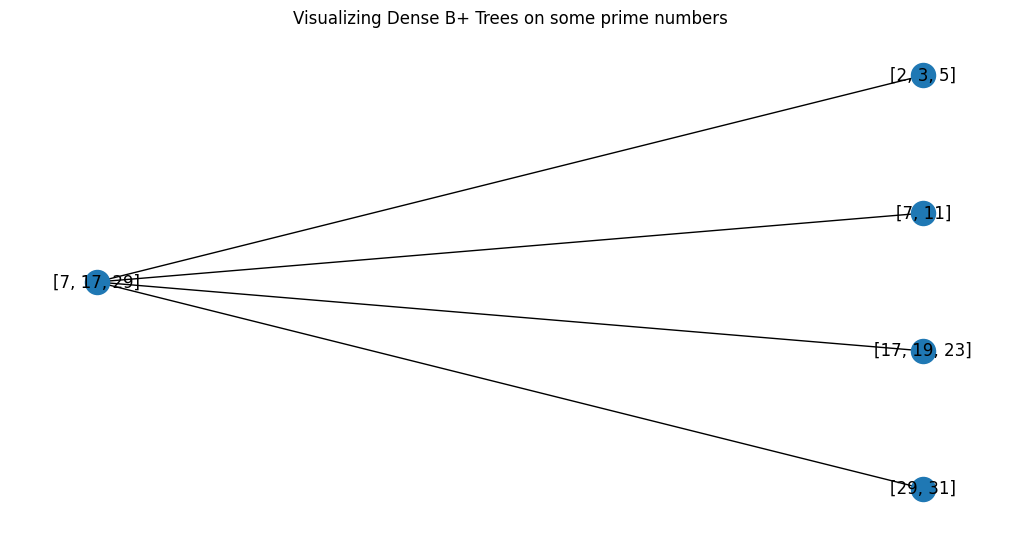

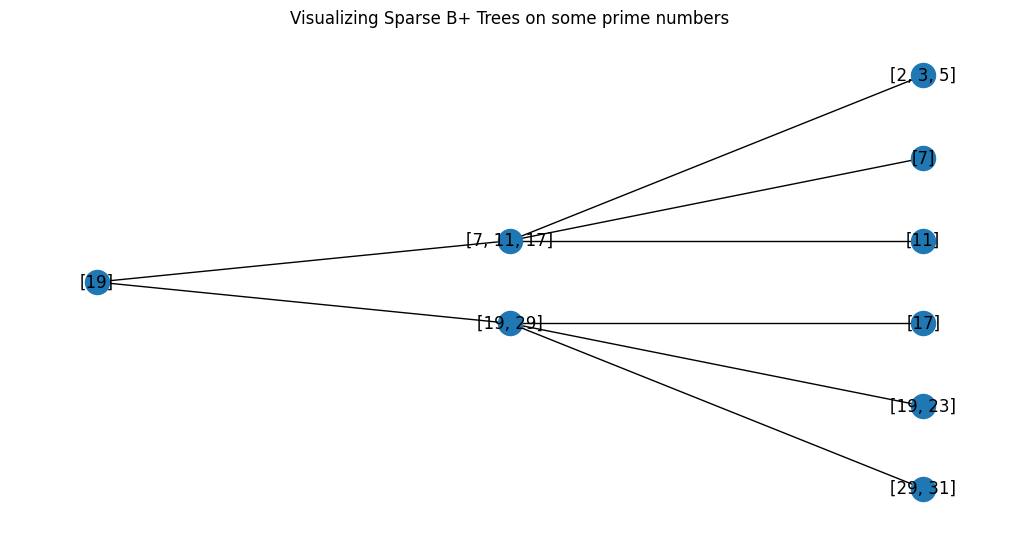

In [2]:
elements_to_insert = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3]
bpt_dense = BPlusTree(4)
bpt_dense.build_tree(elements_to_insert)
bpt_sparse = BPlusTree(4)
bpt_sparse.build_tree(elements_to_insert, dense= False)
bpt_dense.visualize(title= "Visualizing Dense B+ Trees on some prime numbers", 
                    figsize = (10,5))
bpt_sparse.visualize(title= "Visualizing Sparse B+ Trees on some prime numbers", 
                     figsize= (10,5))

### Operations on B+ Trees

#### Search Operations

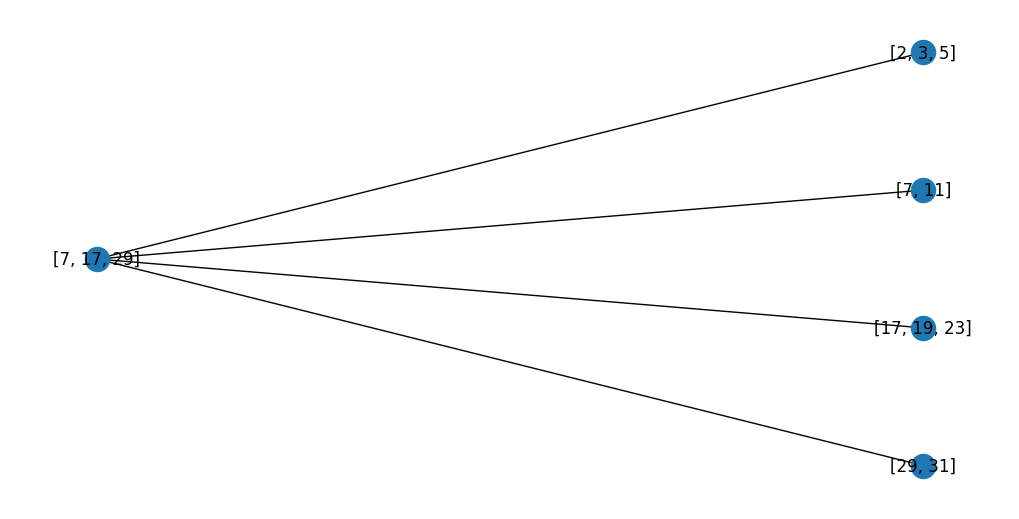

Element 29 found
Element 5 found
Element 7 found
Element 17 found
Element 19 found
Element 31 found
Element 2 found
Element 23 found
Element 11 found
Element 3 found
Element 100 not found
Element 500 not found
Leaf chain:
2 --> 3 --> 5 --> 7 --> 11 --> 17 --> 19 --> 23 --> 29 --> 31
Range Search for 1 to 31: [2, 3, 5, 7, 11, 17, 19, 23, 29, 31]
Range Search for 5 to 17: [5, 7, 11, 17]
Range Search for 7 to 11: [7, 11]
Range Search for 10 to 23: [11, 17, 19, 23]
Range Search for 18 to 23: [19, 23]
Range Search for 30 to 31: [31]
key_start 30 must be less than or equal to key_end 20


In [3]:
# order = 4 --> Maximum 3 chilrdren per node
bpt = BPlusTree(4)

# Inserting multiple elements and visualizing after each insert

elements_to_insert = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3]

for key in elements_to_insert:
    bpt.insert(key)
bpt.visualize(title = "B+ Tree with n = 3 to demonstrate the search operations")
elements_to_search = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3, 100, 500]
for element in elements_to_search:
    if bpt.search(element):
        print(f"Element {element} found")
    else:
        print(f"Element {element} not found")

### Verify leaf_chain
bpt.verify_leaf_chain()

### Testing Range Search
start = [1, 5, 7, 10, 18, 30, 30]
end = [31, 17, 11, 23, 23, 31, 20]
for s, e in zip(start, end):
    try:
        result = bpt.range_search(s, e)
        print(f"Range Search for {s} to {e}: {result}")
    except Exception as e:
        print(e)


#### Insertion and deletion

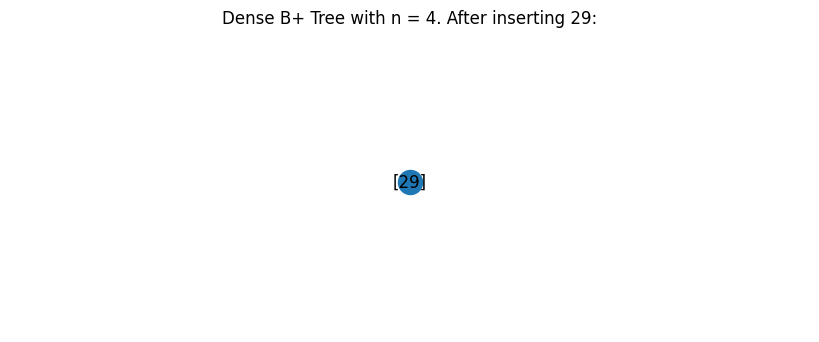

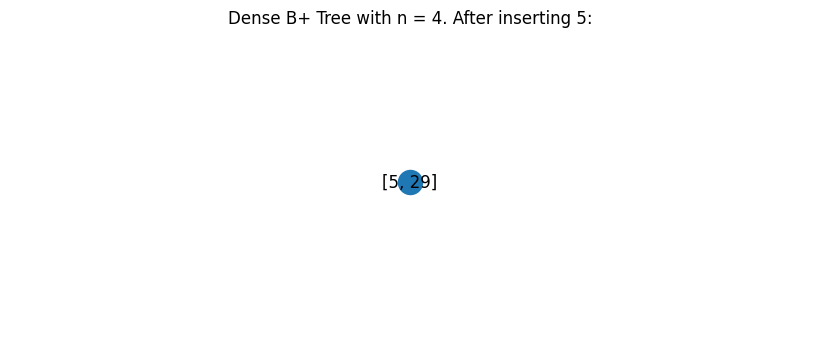

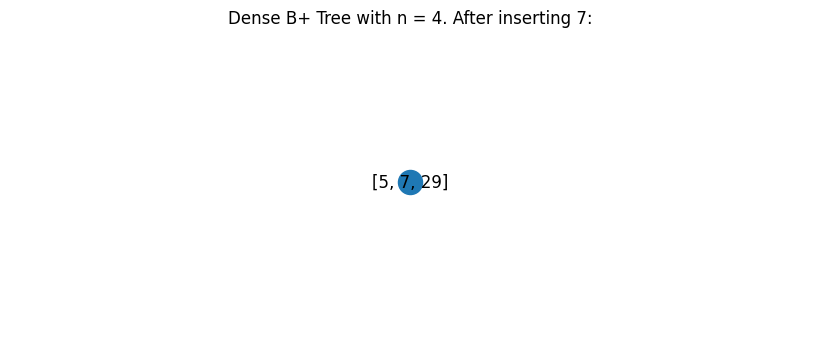

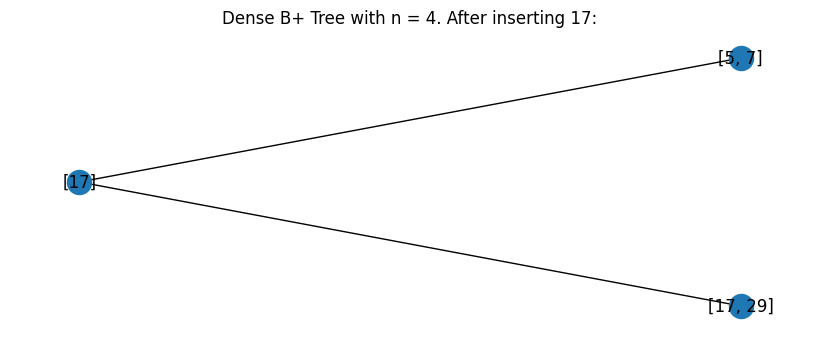

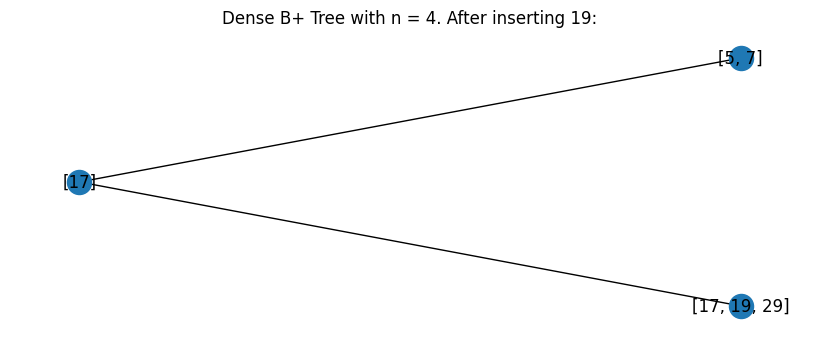

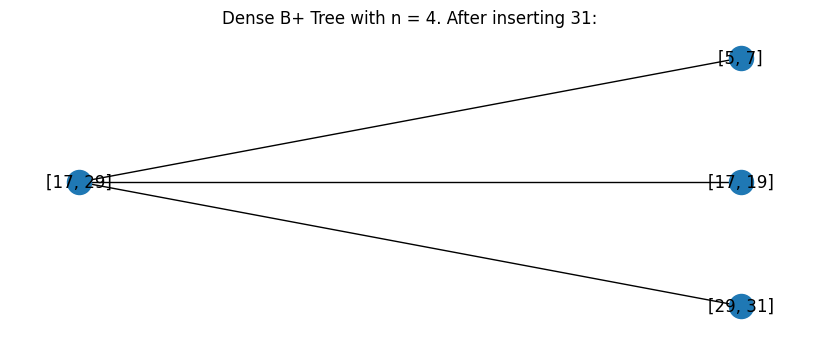

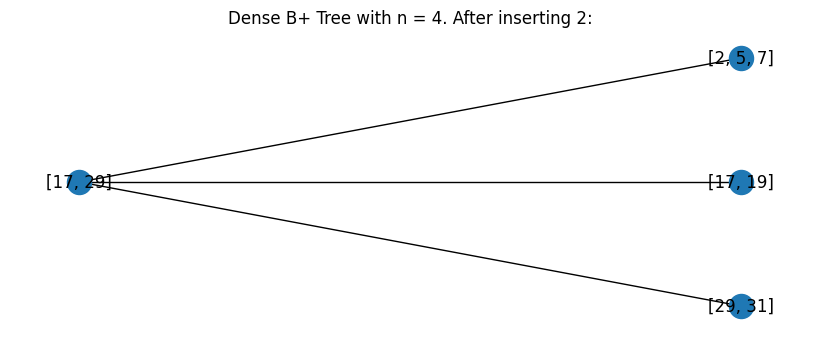

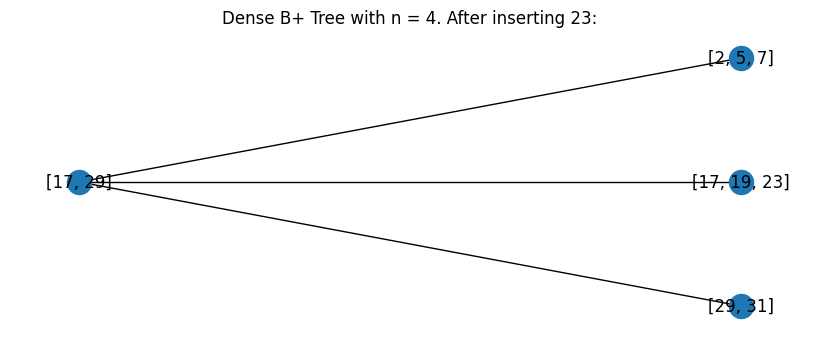

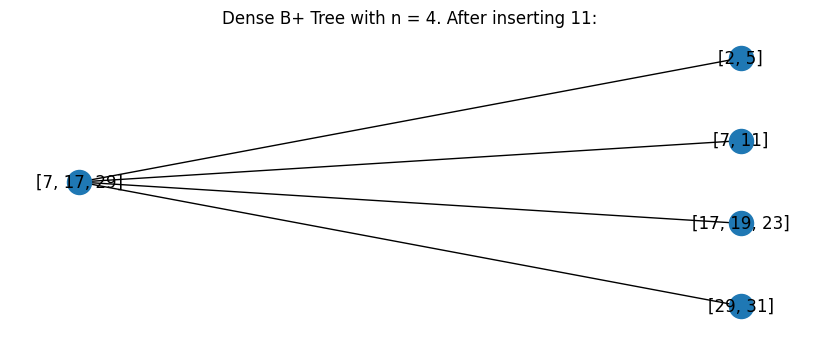

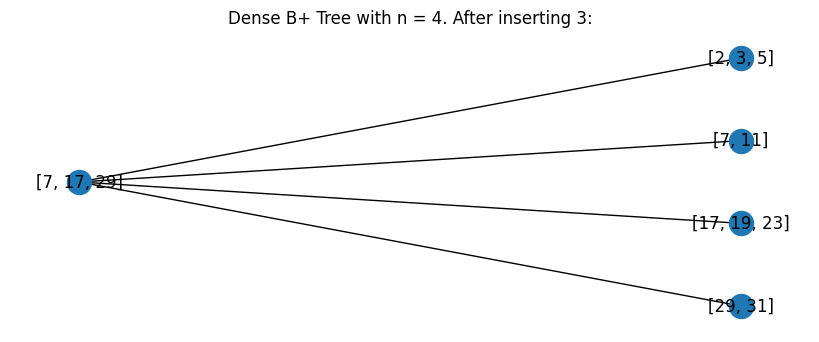

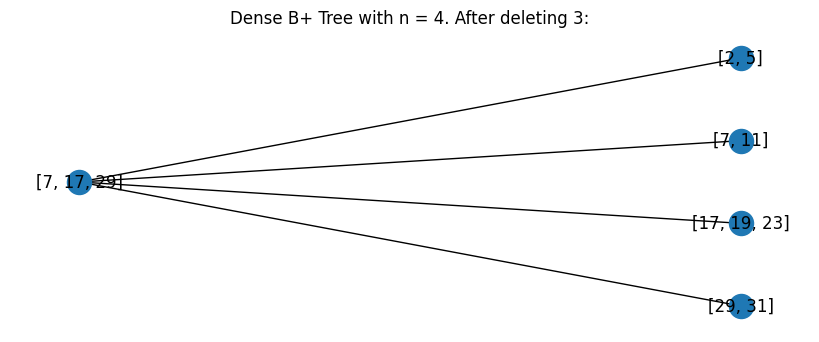

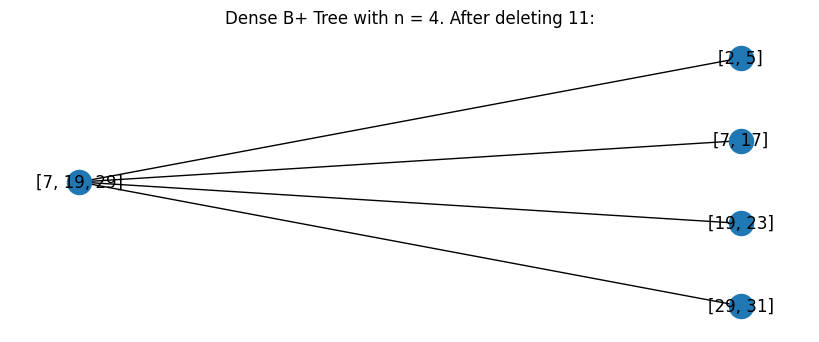

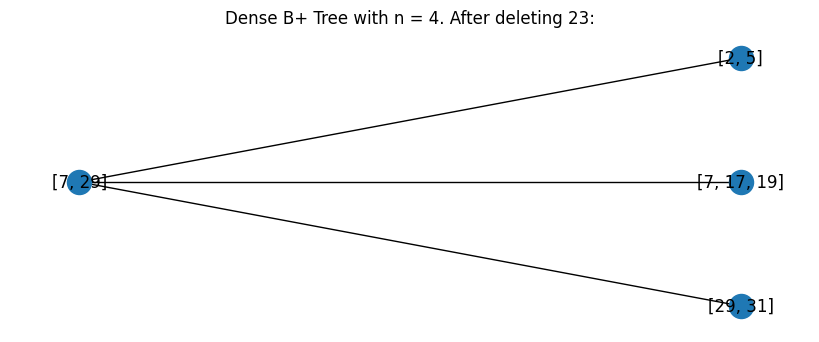

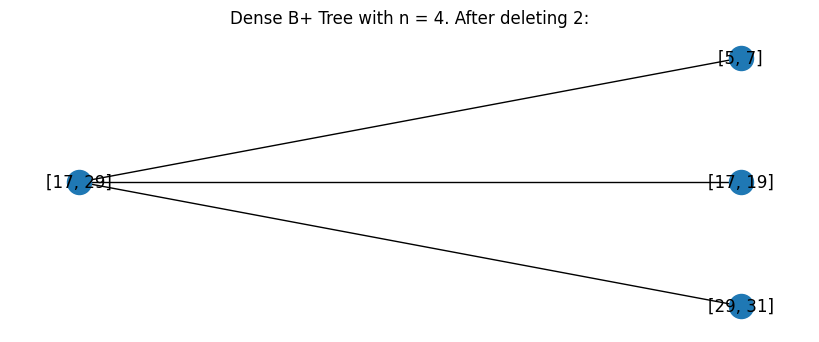

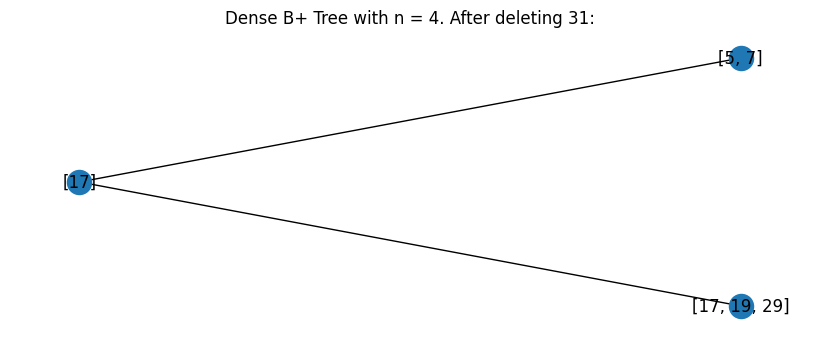

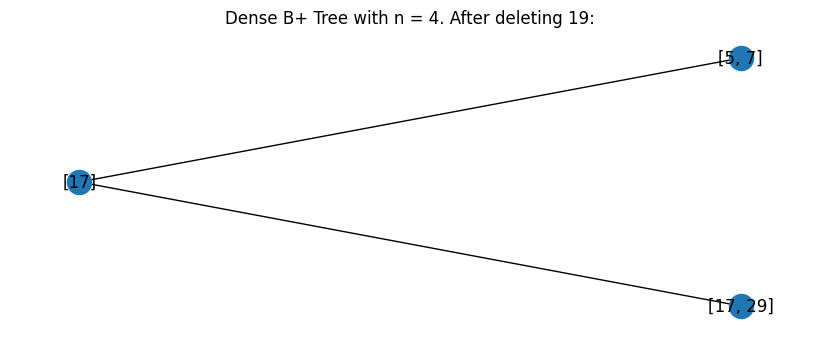

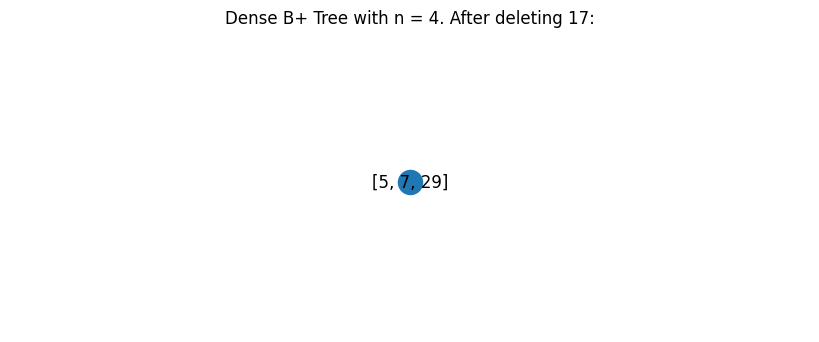

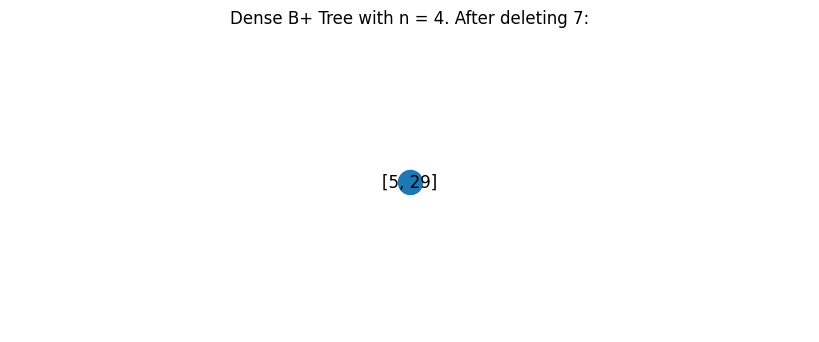

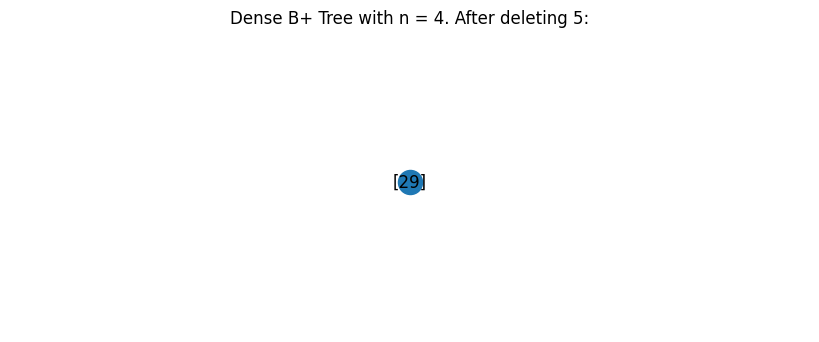

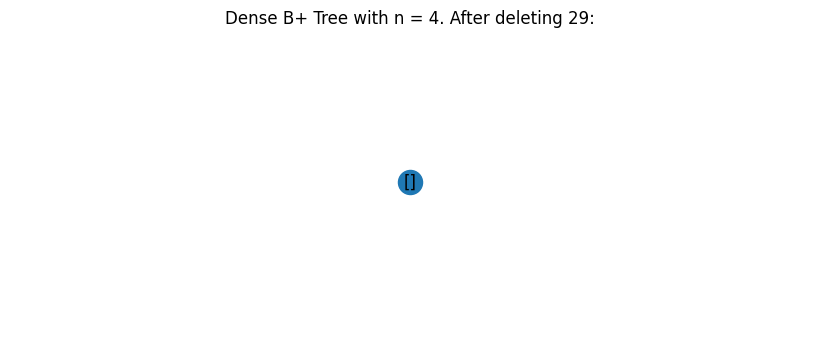

In [4]:
# order = 4 --> Maximum 3 chilrdren per node
bpt = BPlusTree(4)

# Inserting multiple elements and visualizing after each insert

elements_to_insert = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3]

for key in elements_to_insert:
    bpt.insert(key)
    bpt.visualize(figsize= (8, 3), title = f"Dense B+ Tree with n = 4. After inserting {key}:")

for key in reversed(elements_to_insert):
    bpt.delete(key)
    bpt.visualize(figsize= (8, 3), title = f"Dense B+ Tree with n = 4. After deleting {key}:")

## Advanced Testing
---
This testing procedure is designed to evaluate the functionality of the B+ Tree implementation under various operations such as insertion, deletion, and search. It dynamically tests different tree orders and records results systematically. 

### Setup and Execution

- **Record Generation**: The procedure begins by generating a specified number of unique records (here 10,000 records are generated) within a defined range (here from 100,000 to 200,000). These records serve as the dataset for populating the B+ trees.

- **Tree Initialization**: Two types of trees (dense and sparse) are initialized for 2 values (i.e., order = 13, 24). The 'dense' trees are built with maximum node filling, while 'sparse' trees are less filled.

- **Operation Testing**: For each tree:
  - A series of operations including insertions, deletions, additional custom operations, and searches are performed. A summary of all cases is desribed below:
    * (c1) apply 2 randomly generated insertion operations on each of the dense trees;
    * (c2) apply 2 randomly generated deletion operations on each of the sparse trees;
    * (c3) apply 5 additional randomly generated insertion/deletion operations on each of the dense and sparse trees;
    * (c4) apply 5 randomly generated search operations on each of the dense and sparse trees. 
  - Each operation is performed sequentially, and before-and-after states can be visualized for trees with order less than 5.
  - Results are logged into text files within a timestamped directory for review and verification.

- **Visualizations**: If the tree order is less than 5, visual representations of the tree are displayed before and after each operation to provide a clear graphical representation of the tree's structure changes.

- **Logging**: All operations are logged into separate files stored in a directory labeled with the current timestamp. This structured logging helps in detailed analysis post-testing.

### Exception Handling

- The script includes error handling to catch and log exceptions that may occur during tree operations, ensuring that testing can proceed without interruption across different scenarios.

In [5]:
# Execute the test procedure
test_operations()

************************************************************
Starting test operations script...

Testing dense_order_13:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.

Testing sparse_order_13:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.

Testing dense_order_24:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.

Testing sparse_order_24:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.
************************************************************
Test oper